### 实验介绍

#### 数据说明
该数据集是来自美国疾病控制预防中心的数据，背景是记录美国的糖尿病症状信息，现在美国1/7的成年人患有糖尿病。但是到2050年，这个比例将会快速增长至高达1/3。我们可以利用从UCI机器学习数据库里一个关于印第安人糖尿病数据集，通过数据挖掘相关算法来预测糖尿病，该问题本质上是一个二元分类问题。


### 挖掘流程

In [2]:
# 警告处理 
import warnings
warnings.filterwarnings('ignore')
# 在Jupyter上画图
%matplotlib inline

In [3]:
#引入相关支持的包
import pandas as pd
import numpy as np
#可以事先将提供的数据集存储在本地，此处对该地址进行引用即可
#注意文件所存放路径不要有中文，容易报错
df= pd.read_csv(r'.\diabetes_data_upload.csv',sep=',')
#并观察熟悉数据
print(df.shape)
print("数据集-李立萌") 
df.head()


(520, 17)
数据集-李立萌


,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1


利用head函数，可以看到：糖尿病数据集由520个数据点组成，各有17个特征，特征分别是：年龄，性别，多尿症，烦渴，体重突然下降，弱点，多食症，生殖器鹅口疮，视觉模糊，瘙痒，易怒，延迟愈合，部分麻痹，肌肉僵硬，脱发，肥胖，结果。特征为1代表yes,特征为0代表NO,性别一栏，1代表Male,0代表Female.此处是一个数据框格式，前16个特征均是数值型属性，最后1列是目标向量，是我们将要预测的特征，其中0意味着未患糖尿病，1意味着患有糖尿病。

通过info（）方法可以快速获取数据集的简单描述。如总行数，每个属性的类型和非空值的数量。

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

查看非数字字段有多少分类存在，每个分类数量

In [5]:
df['class'].value_counts()

class
1    320
0    200
Name: count, dtype: int64

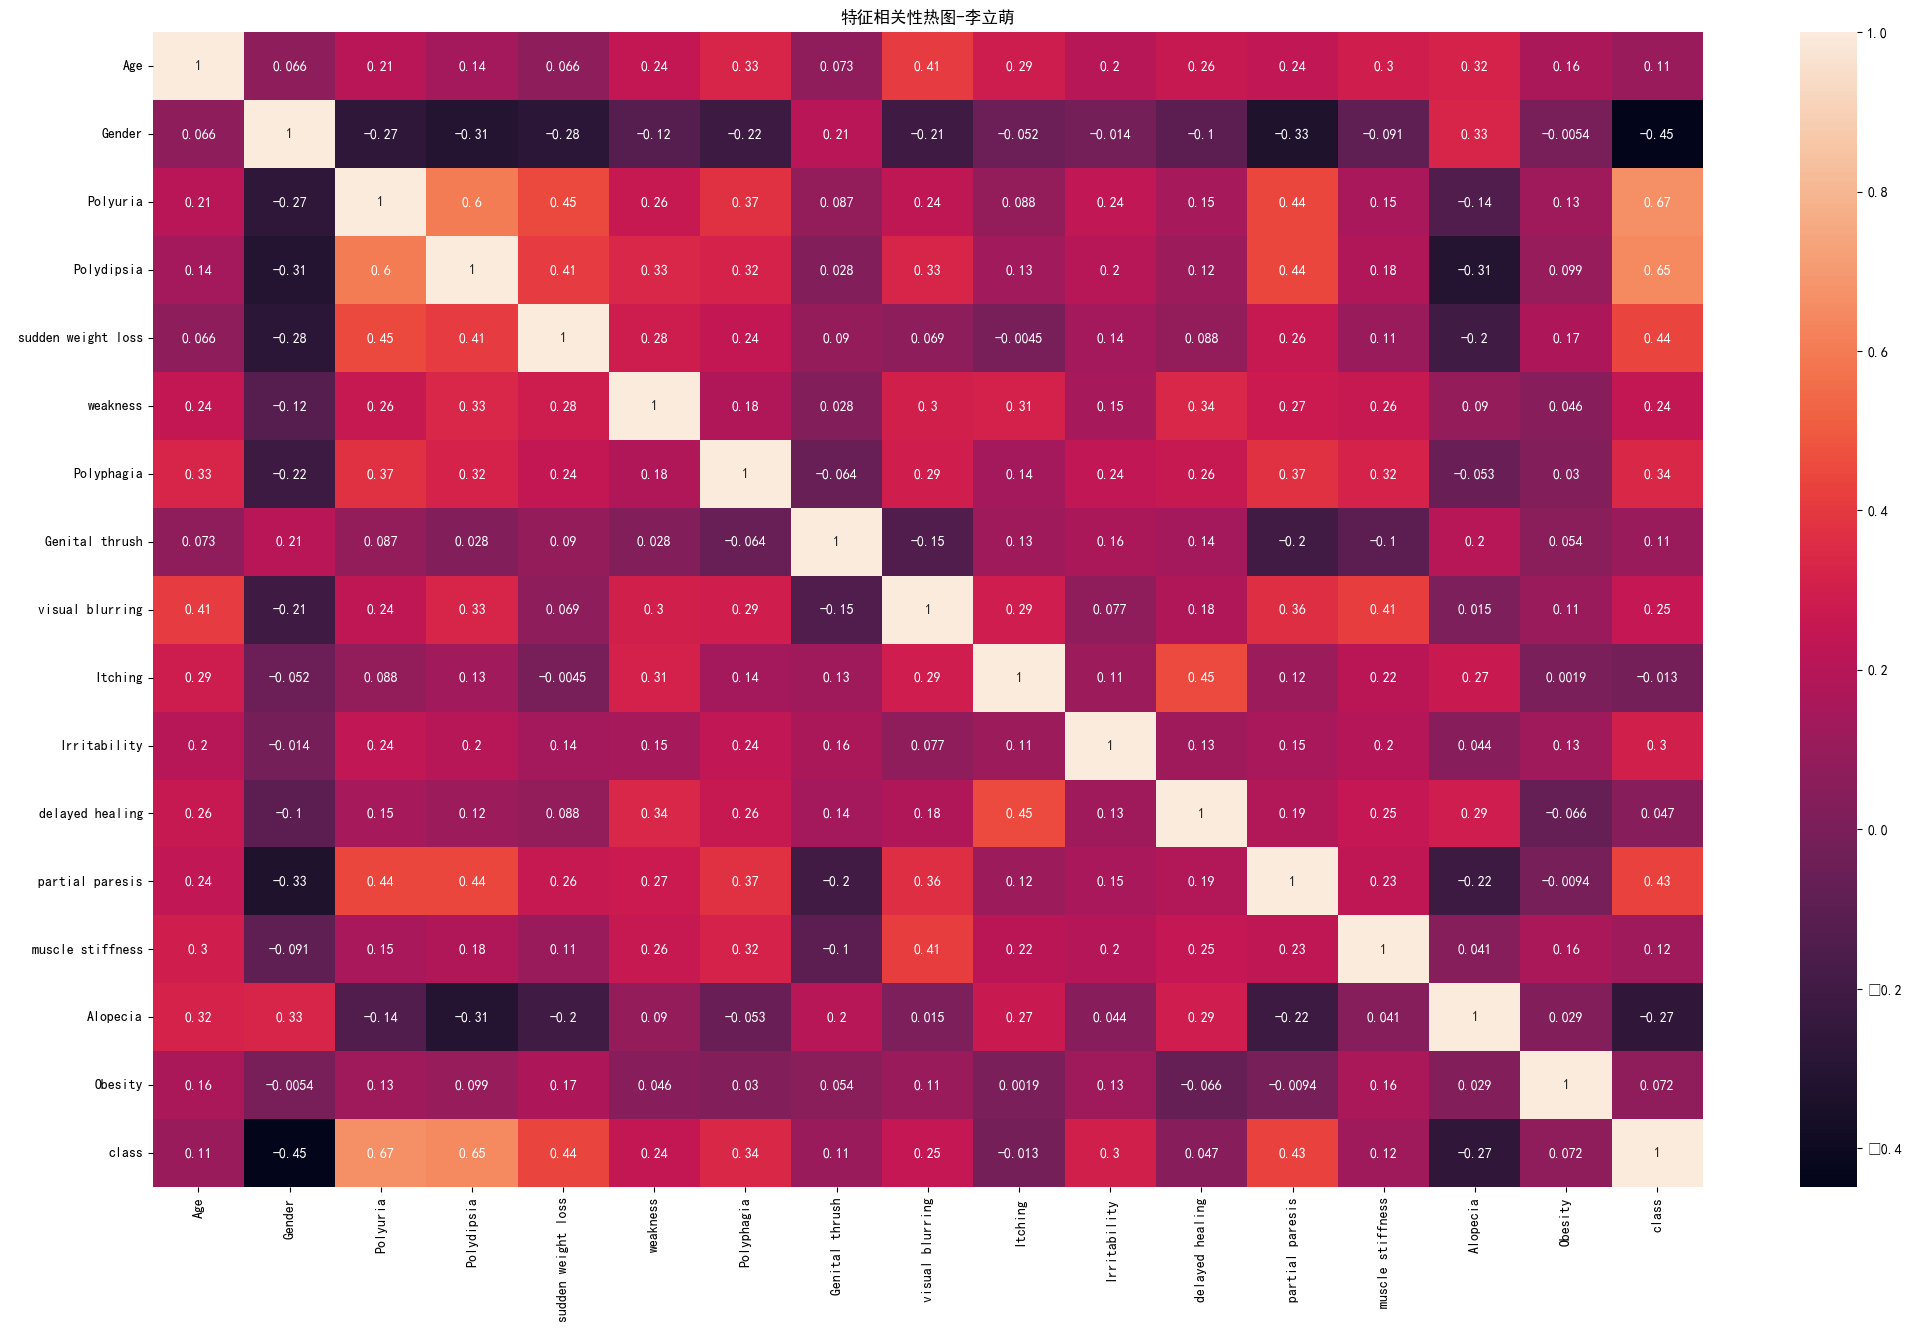

In [6]:
#导入相关包
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
#计算特征相关性并可视化
corr_matrix = df.corr(method='spearman') # pearson 皮尔逊, 是spearman 斯皮尔曼 
plt.figure(figsize=(25, 15))
sns.heatmap(corr_matrix, annot= True)
plt.title("特征相关性热图-李立萌")
plt.rcParams['font.sans-serif'] = ['SimHei']

In [7]:
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns  
  
# 绘制每个特征的分布  
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):  
    # 设置 seaborn 样式    
    sns.set_style('whitegrid')   
      
    # 计算行数，确保为整数  
    rows = int(np.ceil(dataset.shape[1] / cols))  
      
    # 创建一个带有指定大小和间距的图形  
    fig, axes = plt.subplots(rows, cols, figsize=(width, height), squeeze=False, gridspec_kw={'wspace': wspace, 'hspace': hspace})  
      
    # 遍历数据集的所有列  
    for i, column in enumerate(dataset.columns):  
        ax = axes[i // cols, i % cols]  # 选择子图  
        ax.set_title(column)  
          
        if dataset.dtypes[column] == object:  # 如果列是分类类型（通常是字符串）  
            g = sns.countplot(y=column, data=dataset, ax=ax)  
            # 如果标签太长，可能需要截断  
            labels = [s.get_text()[:18] for s in g.get_yticklabels()]  
            g.set_yticklabels(labels)  
            # 对于countplot，通常不需要设置x轴的旋转，因为x轴通常是计数  
        else:  # 如果列是数值类型  
            sns.histplot(dataset[column], kde=True, ax=ax)  # kde=True 会添加核密度估计曲线  
            # 设置x轴刻度标签的旋转角度  
            ax.set_xticklabels(ax.get_xticklabels(), rotation=25)  
    print("每个数值属性的直方图-李立萌")  
    plt.tight_layout()  # 确保子图不会重叠  
    plt.show()  
  
# 假设df是已经存在的pandas DataFrame  
# plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

每个数值属性的直方图-李立萌


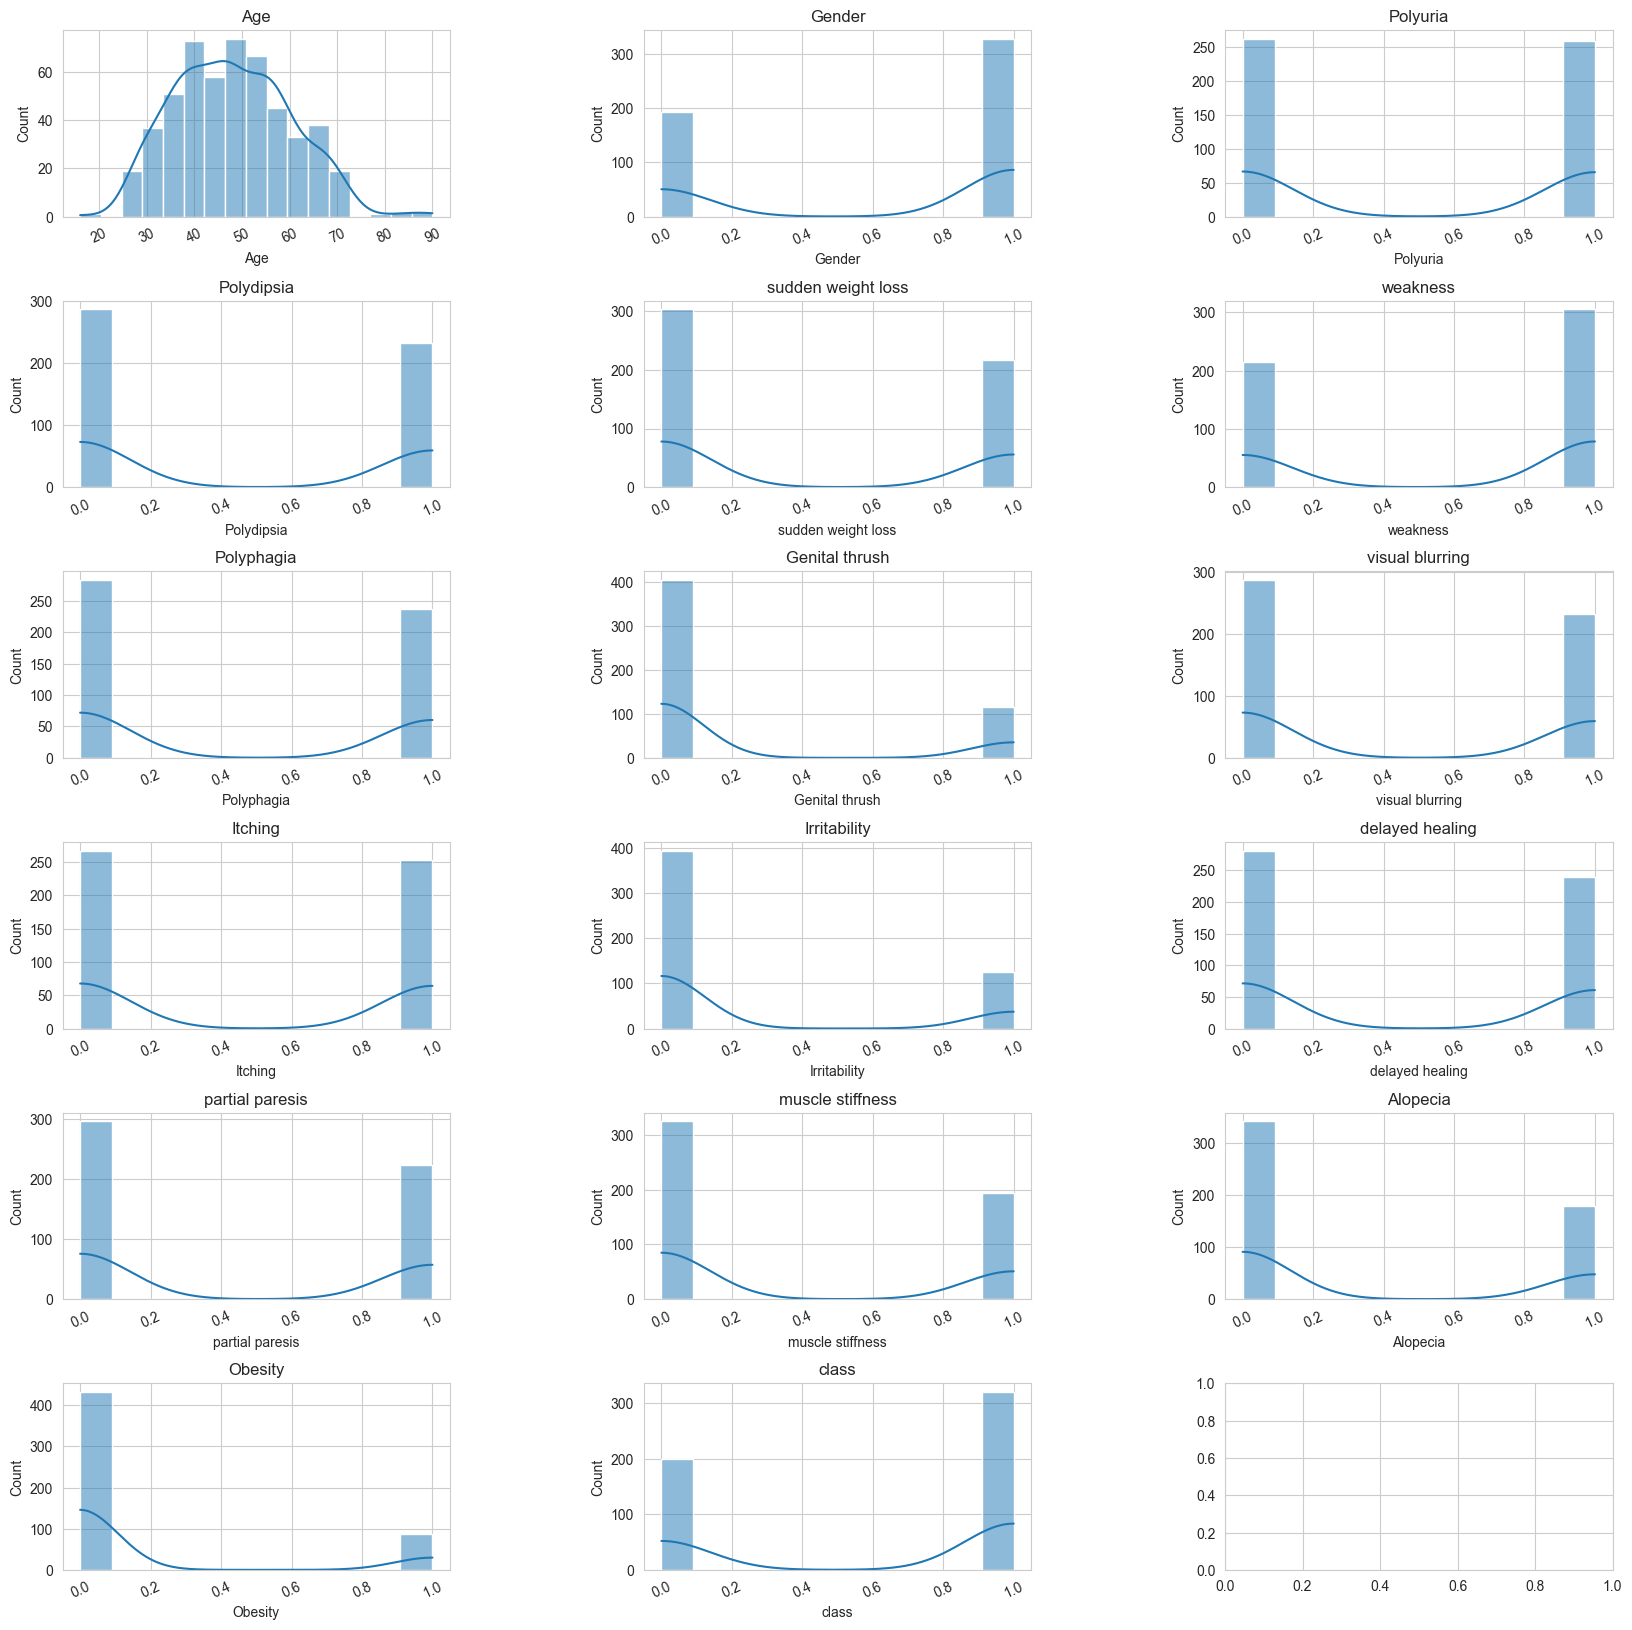

In [8]:
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [9]:
from sklearn.model_selection import train_test_split
from collections import Counter
x_cols = [col for col in df.columns if col!='class']
y_col = 'class'
X=df[x_cols].values    #dataframe 转化为 ndarray,才能进入下面的标准化和3D制图
y=df[y_col].values


##### Axes3D 绘图函数
是mpl_toolkits.mplot3d中的一个绘图函数，mpl_toolkits.mplot3d

p3d.Axes3D.scatter( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs )

p3d.Axes3D.scatter3D( xs, ys, zs=0, zdir=’z’, s=20, c=None, depthshade=True, *args, **kwargs)

Found 200 points for class class_1
Found 320 points for class class_2
3D散点图-李立萌


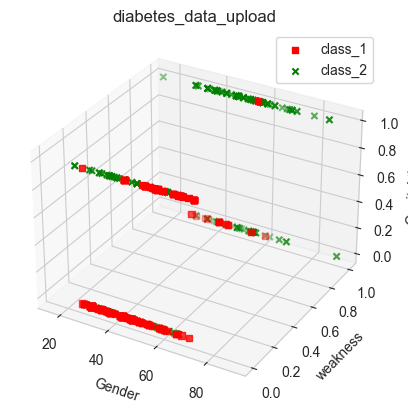

In [11]:
import numpy as np  
import matplotlib.pyplot as plt  
from mpl_toolkits.mplot3d import Axes3D  
  
# 假设您已经有了df, X, y等数据  
  
# 绘制3D散点图  
fig = plt.figure()  # 创建一个新的图形窗口  
ax = fig.add_subplot(111, projection='3d')  # 添加一个3D轴到图形窗口  
  
for c, m, i, l in zip('rg', 'sx', np.unique(y), ['class_1', 'class_2']):  
    points = X[y == i]  
    if points.shape[0] > 0:  
        print(f"Found {points.shape[0]} points for class {l}")  
        ax.scatter(points[:, 0], points[:, 4], points[:, 6], c=c, marker=m, label=l)  
  
ax.set_xlabel(df.columns[1])  
ax.set_ylabel(df.columns[5])  
ax.set_zlabel(df.columns[7])  
ax.set_title("diabetes_data_upload")  
ax.legend()  # 添加图例  
print("3D散点图-李立萌") 
plt.show()  # 显示图形窗口

##### 对数据集进行分隔，随机分为训练子集和测试子集。

In [12]:
plt.show()  # 显示图形窗口
from sklearn.model_selection import train_test_split
df.info()     # get the diatebes' info
x_train, x_test, y_train, y_test = train_test_split(
    df.loc[:, df.columns != 'class'],
    df['class'], stratify=df['class'],
    random_state=66)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
 16  class               520 non-null    int64
dt

##### 1.KNN算法

k-NN算法几乎可以说是机器学习中最简单的算法。建立模型只需存储训练数据集。而为了对新的数据点做出预测，该算法会在训练数据集中找到与其相距最近的数据点——也就是它的“近邻点”。

训练集和测试集在模型预测准确度和近邻点之间的关系图-倪颖


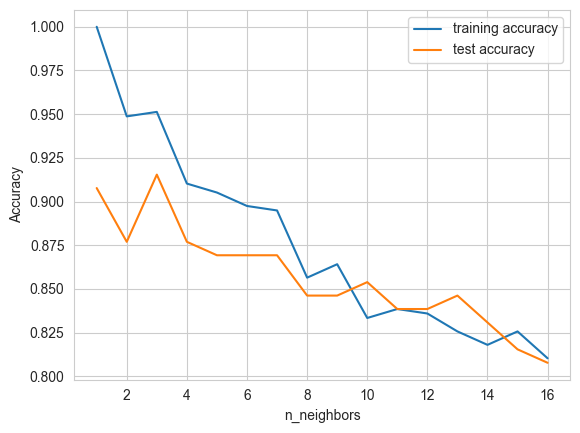

In [13]:
from sklearn.neighbors import KNeighborsClassifier
training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 17)
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)  # build the models
    knn.fit(x_train, y_train)  # use x_train as train data and y_train as target value
    training_accuracy.append(knn.score(x_train, y_train))  # record training set accuracy
    test_accuracy.append(knn.score(x_test, y_test))  # record test set accuracy

'''
The relationship between the training set and the test set on the model prediction
accuracy (Y-axis) and the number of nearest neighbors (X-axis) is demonstrated
'''
plt.figure()
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
print("训练集和测试集在模型预测准确度和近邻点之间的关系图-倪颖")
plt.show()

使用KNN算法寻找训练集和测试集在模型预测准确度（y轴）和近邻点个数（x轴）设置之间的关系。得到的关系图片如下：

为了使训练集和测试集的准确度都最高，我们选择8个邻近点，即n_neghbors=8。

In [14]:

# select n_neighbors =8 
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(x_train, y_train)
print("Accuracy of K-NN classifier on training set: {:.2f}".format(knn.score(x_train, y_train)))
print("Accuracy of K-NN classifier on test set: {:.2f}".format(knn.score(x_test, y_test)))
  


Accuracy of K-NN classifier on training set: 0.86
Accuracy of K-NN classifier on test set: 0.85


在上一步的基础上，我们选择了n_neighbors=9来进行KNN算法模拟，输出KNN分类训练的准确度

<p>Accuracy of K-NN classifier on training set: 0.86
</p>
Accuracy of K-NN classifier on test set: 0.85


#### 最佳K值选取-交叉验证法选取最佳k值


1.数据标准化

In [15]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

2.寻找最佳k值

In [16]:
from sklearn.model_selection import GridSearchCV # 通过网格方式来搜索参数
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
# 设置需要搜索的K值， 'n_neighbors'是sklearn中KNN的参数
parameters = {'n_neighbors':range(1,31)}
knn = KNeighborsClassifier()  # 注意：在这里不用指定参数

# 通过GridSearchCV来搜索最好的K值。 这个模块的内部其实
# 就是对于每一个K值做了评估
clf = GridSearchCV(knn, parameters, cv=5)   
clf.fit(X_train, y_train)

# 输出最好的参数以及对应的准确率
print ("best score is: %.2f"%clf.best_score_, "  best param: ",clf.best_params_)

best score is: 0.96   best param:  {'n_neighbors': 1}


寻找最佳k值的可视化

不同k值与训练/测试精确度关系图-郑冰夷


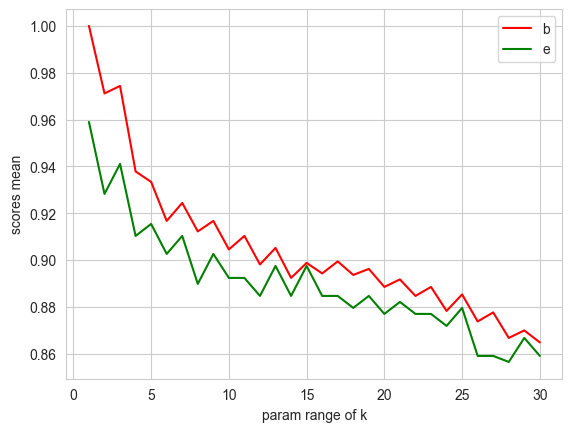

In [18]:
import matplotlib.pyplot as plt
from sklearn.model_selection import validation_curve

param_name = 'n_neighbors'
param_range = range(1, 31)

# scoring: 分类用 accuracy, 回归用 mean_squared_error
train_scores, test_scores = validation_curve(
    KNeighborsClassifier(), X_train, y_train, cv=5,
    param_name=param_name, param_range=param_range,
    scoring='accuracy')

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(param_range,train_scores_mean, color='red', label='train')
plt.plot(param_range, test_scores_mean, color='green', label='test')
plt.legend('best')
plt.xlabel('param range of k')
plt.ylabel('scores mean')
print("不同k值与训练/测试精确度关系图-郑冰夷")
plt.show()

综上可以看出最优k值为1,此时训练集与测试集得分最高

In [19]:
#用最佳K值训练
classifier = KNeighborsClassifier(n_neighbors=1)
classifier.fit(X_train, y_train)
print(classifier)
#用测试集测试结果
score = classifier.score(X_test, y_test)
print('训练数据集得分：{:.2f}'.format(classifier.score(X_train,y_train)))
print('测试数据集得分：{:.2f}'.format(classifier.score(X_test,y_test)))

KNeighborsClassifier(n_neighbors=1)
训练数据集得分：1.00
测试数据集得分：0.98


#### 2.线性逻辑回归


In [20]:
from sklearn.linear_model import LogisticRegression
# logistic regression analysis
"""
The accuracy of the model with regularization parameter C=1(default value) was 78%
the training set and 77% on the test set
"""
logreg = LogisticRegression(solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(x_test, y_test)))

Training set score : 0.915
Test set score: 0.962


对数据再进行逻辑回归训练，得到的训练准确度如下：



<p>Training set score : 0.915</p>
Test set score: 0.962

在这里可以设置正则化参数C的值，默认值为1，当我们设置为C=100时，

In [21]:
"""
When the regularization parameter C is set to 100,
the accuracy of the model on the training set is slightly improved.
but the accuracy on the test set is slightly reduced.
"""
logreg100 = LogisticRegression(C=100, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg100.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(x_test, y_test)))

Training set score : 0.921
Test set score: 0.938


<p>Training set score : 0.921</p>
Test set score: 0.938

而将正则化参数C设置为100时，模型在训练集上准确度稍有提高但测试集上准确度略降，说明较少正则化和更复杂的模型并不一定会比默认参数模型的预测效果更好。

当C=0.001时，得到的准确度如下：

In [22]:
logreg001 = LogisticRegression(C=0.001, solver='liblinear').fit(x_train, y_train)
print("Training set score : {:.3f}".format(logreg001.score(x_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(x_test, y_test)))

Training set score : 0.615
Test set score: 0.615


<p>Training set score : 0.615</p>
Test set score: 0.615

接下来用可视化的方法来看看不同正则化参数下所得的模型系数。

模型系数图-倪颖


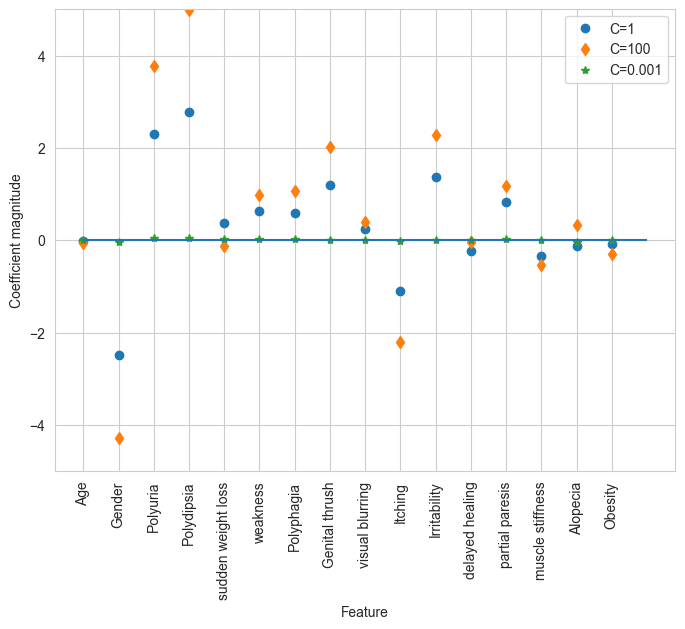

In [23]:
diabetes_features = [x for i, x in enumerate(df.columns) if i != 16]

plt.figure(figsize=(8, 6))
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, 'd', label="C=100")
plt.plot(logreg001.coef_.T, '*', label="C=0.001")
# 调整 range 以匹配特征数量
plt.xticks(range(len(diabetes_features)), diabetes_features, rotation=90)
plt.hlines(0, 0, len(diabetes_features))
plt.ylim(-5, 5)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")
plt.legend()
print("模型系数图-倪颖")
plt.show()

更强的正则化(C = 0.001)会使系数越来越接近于零。可以看到“Polyuria”（糖尿病遗传函数）在 C=100, C=1 和C=0.001的情况下, 系数都为正。这表明无论是哪个模型，Polyuria（糖尿病遗传函数）这个特征值都与样本为糖尿病是正相关的。

#### 3.决策树

In [24]:
from sklearn.tree import DecisionTreeClassifier
# decision tree
"""
The results show that the accuracy of the training set is 100%,
while the accuracy of the test set is only 74.1%. So the decision tree is over-fitting.
"""
tree = DecisionTreeClassifier(random_state=0)
tree.fit(x_train, y_train)
print("\nPreliminary results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))


Preliminary results of decision tree fitting:
Accuracy on training set: 1.000
Accuract on test set: 0.946


<p>Preliminary results of decision tree fitting:</p><p>Accuracy on training set: 1.000</p>
Accuract on test set: 0.946

训练集的准确度可以高达100%，而测试集的准确度相对就差了很多。这表明决策树是过度拟合的，不能对新数据产生好的效果。因此，我们需要对树进行预剪枝。

我们设置max_depth=8，限制树的深度以减少过拟合。这会使训练集的准确度降低，但测试集准确度提高。

In [25]:
# 设置max_depth=8，代码和输出结果如下：
# setting max_depth=8, limit the depth of the tree to reduce overfitting.
tree = DecisionTreeClassifier(max_depth=8, random_state=0)
tree.fit(x_train, y_train)
print("\nFinally results of decision tree fitting:")
print("Accuracy on training set: {:.3f}".format(tree.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(tree.score(x_test, y_test)))
# output the feature importance
print("Feature importance:\n{}".format(tree.feature_importances_))


Finally results of decision tree fitting:
Accuracy on training set: 0.997
Accuract on test set: 0.954
Feature importance:
[0.10621986 0.10764161 0.08758267 0.45176861 0.00728138 0.01134466
 0.00728138 0.02513318 0.00145628 0.02401271 0.04165056 0.06156079
 0.         0.         0.06706631 0.        ]


<p>Finally results of decision tree fitting:</p>
<p>Accuracy on training set: 0.997</p>
Accuract on test set: 0.954

看到训练集准确度有所降低，但测试集准确度升高了。此外还输出了决策树中的特征重要性——决策树的特征重要性用来衡量每个特征对预测结果的重要性的。

#### 参数优化

1.maxdepth参数优化

深度限制max_depth与测试得分score关系图-郑冰夷


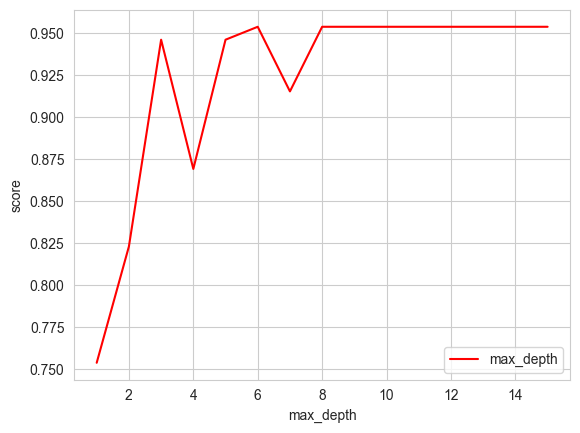

In [26]:
import matplotlib.pyplot as plt
test = []
#可视化显示max_depth与score得分关系图
for i in range(15):
    clf = DecisionTreeClassifier(max_depth=i+1,criterion="entropy",random_state=0,splitter="random")
    clf = clf.fit(x_train, y_train)
    score = clf.score(x_test,y_test)
    test.append(score)
plt.plot(range(1,16),test,color="red",label="max_depth")
plt.legend()
plt.ylabel("score")
plt.xlabel("max_depth")
print("深度限制max_depth与测试得分score关系图-郑冰夷")
plt.show()

2.GridSearch网格搜索参数调优

In [27]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [5, 7, 9, 11, 13], 'criterion':['gini', 'entropy'], 'min_samples_split':[5, 7, 9, 11, 13, 15]}
model = DecisionTreeClassifier()  
grid_search = GridSearchCV(model, parameters, scoring='roc_auc', cv=5)
grid_search.fit(x_train, y_train)
#从选取参数中得到最优组合
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 9}

{'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 9}

In [28]:
#使用最优参数建模
model = DecisionTreeClassifier(criterion='gini',max_depth=7,min_samples_split=9) 
model.fit(x_train, y_train)
#效果检验
print("Accuracy on training set: {:.3f}".format(model.score(x_train, y_train)))
print("Accuract on test set: {:.3f}".format(model.score(x_test, y_test)))

Accuracy on training set: 0.972
Accuract on test set: 0.915


Accuracy on training set: 0.972
Accuract on test set: 0.915

打印树

In [29]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(model, out_file=None, feature_names= list(df.loc[:, df.columns != 'class']), class_names=['0', '1'], filled=True,rounded=True)
graph = graphviz.Source(dot_data)
print(graph)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname="helvetica"] ;
edge [fontname="helvetica"] ;
0 [label="Polydipsia <= 0.5\ngini = 0.473\nsamples = 390\nvalue = [150, 240]\nclass = 1", fillcolor="#b5daf5"] ;
1 [label="Gender <= 0.5\ngini = 0.427\nsamples = 207\nvalue = [143, 64]\nclass = 0", fillcolor="#f1b992"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Alopecia <= 0.5\ngini = 0.405\nsamples = 46\nvalue = [13.0, 33.0]\nclass = 1", fillcolor="#87c4ef"] ;
1 -> 2 ;
3 [label="Age <= 34.5\ngini = 0.251\nsamples = 34\nvalue = [5, 29]\nclass = 1", fillcolor="#5baee9"] ;
2 -> 3 ;
4 [label="gini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = 0", fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label="Irritability <= 0.5\ngini = 0.074\nsamples = 26\nvalue = [1, 25]\nclass = 1", fillcolor="#41a1e6"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 22\nvalue = [0, 22]\nclass = 1", fillcolor="#399de5"] ;
5 -> 6 ;
7 [label="gini = 0.375\nsamples = 4\nvalue = [

对特征重要性进行数据可视化处理：

In [30]:
import numpy as np
import matplotlib.pyplot as plt

# 假设 diabetes_features 列表包含所有特征的名称，长度为 16
diabetes_features = [x for i, x in enumerate(df.columns) if i != 16]

def plot_feature_importances_diatebes(model):
    plt.figure(figsize=(8, 6))
    n_features = len(diabetes_features)  # 设置 n_features 为特征的数量
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), diabetes_features)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

![屏幕截图 2024-05-18 213300.png](<attachment:屏幕截图 2024-05-18 213300.png>)

直观的看出，Polydipsia（多饮）是目前最重要的特征。Age，gender为第二,三重要的信息特征。



对上面三种算法进行测试，分别计算出它们的精确率和召回率，绘制出混淆矩阵。

knn_Test score of the model: 0.8843537414965986
knn_Test Precision: 0.97
knn_Test Recall: 0.81


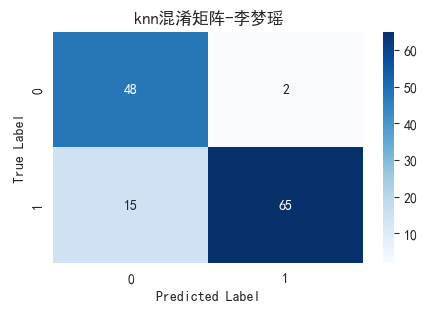

In [31]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score ,f1_score 
import seaborn as sns     

knn.fit(x_train, y_train)  
y_knn_pred = knn.predict(x_test)  
  
# 计算knn混淆矩阵  
cm_knn = confusion_matrix(y_test, y_knn_pred)  

# 打印F1分数
print('knn_Test score of the model: {}'.format(f1_score(y_test, y_knn_pred)))
knn_f1=f1_score(y_test, y_knn_pred)

# 计算knn精确率和召回率  
knn_precision = precision_score(y_test, y_knn_pred)  
knn_recall = recall_score(y_test, y_knn_pred)  
print('knn_Test Precision: {:.2f}'.format(knn_precision))  
print('knn_Test Recall: {:.2f}'.format(knn_recall))  
  
# 使用seaborn绘制knn混淆矩阵  
plt.figure(figsize=(5, 3))  
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
  
plt.title("knn混淆矩阵-李梦瑶")  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

logreg_Test score of the model: 0.968944099378882
logreg_Test Precision: 0.96
logreg_Test Recall: 0.97


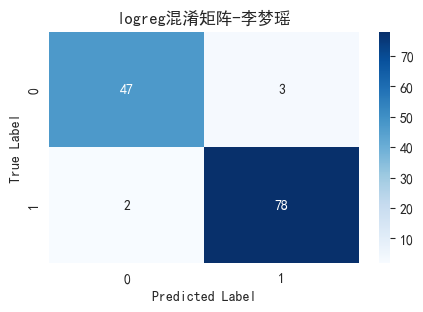

In [32]:
logreg.fit(x_train, y_train)  
y_logreg_pred = logreg.predict(x_test)  
  
# 计算logreg混淆矩阵  
cm_logreg = confusion_matrix(y_test, y_logreg_pred)  

# 打印F1分数
print('logreg_Test score of the model: {}'.format(f1_score(y_test, y_logreg_pred)))
logreg_f1=f1_score(y_test, y_logreg_pred)
# 计算logreg精确率和召回率  
logreg_precision = precision_score(y_test, y_logreg_pred)  
logreg_recall = recall_score(y_test, y_logreg_pred)  
print('logreg_Test Precision: {:.2f}'.format(logreg_precision))  
print('logreg_Test Recall: {:.2f}'.format(logreg_recall))  
  
# 使用seaborn绘制logreg混淆矩阵  
plt.figure(figsize=(5, 3))  
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
  
plt.title("logreg混淆矩阵-李梦瑶")  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

tree_Test score of the model: 0.9615384615384616
tree_Test Precision: 0.99
tree_Test Recall: 0.94


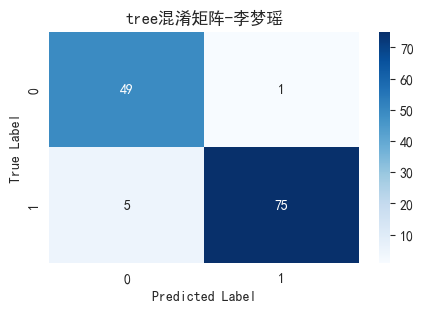

In [34]:
tree.fit(x_train, y_train)  
y_tree_pred = tree.predict(x_test)  
  
# 计算tree混淆矩阵  
cm_tree = confusion_matrix(y_test, y_tree_pred)  

# 打印F1分数
print('tree_Test score of the model: {}'.format(f1_score(y_test, y_tree_pred)))
tree_f1=f1_score(y_test, y_tree_pred)
# 计算tree精确率和召回率  
tree_precision = precision_score(y_test, y_tree_pred)  
tree_recall = recall_score(y_test, y_tree_pred)  
print('tree_Test Precision: {:.2f}'.format(tree_precision))  
print('tree_Test Recall: {:.2f}'.format(tree_recall))  
  
# 使用seaborn绘制tree混淆矩阵  
plt.figure(figsize=(5, 3))  
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')  
plt.xlabel('Predicted Label')  
plt.ylabel('True Label')  
  
plt.title("tree混淆矩阵-李梦瑶")  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.show()

将三种算法的精确率、召回率、F1分数绘制成一张图片进行对比

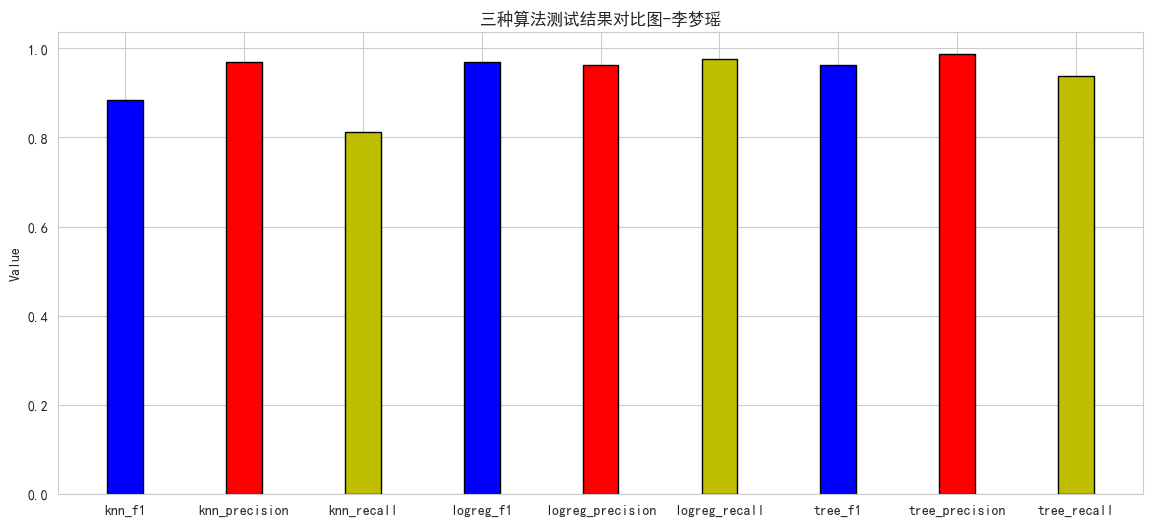

In [35]:
import matplotlib.pyplot as plt  
    
values = [knn_f1, knn_precision, knn_recall, logreg_f1, logreg_precision, logreg_recall, tree_f1, tree_precision, tree_recall]  
  
# 定义每个柱形的颜色
colors = ['b','r','y','b','r','y','b','r','y']  

width = 0.3  # 柱形的宽度  
  
# 计算x轴的位置，使得柱形之间有足够的空间  
index = np.arange(len(values))

# 创建一个figure对象，并设置其尺寸（宽度，高度）  
fig, ax = plt.subplots(figsize=(14, 6)) 

# 绘制柱状图，并指定颜色、宽度和x轴位置  
ax.bar(index, values, width=width, color=colors, edgecolor='black')  

# 添加特征名称到x轴  
feature_names = ['knn_f1','knn_precision', 'knn_recall', 'logreg_f1', 'logreg_precision', 'logreg_recall', 'tree_f1', 'tree_precision', 'tree_recall']  
ax.set_xticks(index)  
ax.set_xticklabels(feature_names)  
  
# 添加标题和y轴标签  
plt.title('三种算法测试结果对比图-李梦瑶')  
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.ylabel('Value')  
  
# 显示图形  
plt.show()